In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

%matplotlib inline

In [ ]:
sns.set_palette('Set3')

In [ ]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
#df = pd.read_csv("./Data_Cortex_Nuclear.csv")
df = pd.read_csv("dielectron.csv")
#df = pd.read_csv("./StudentsPerformance.csv")

In [ ]:
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [ ]:
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['px2', 'phi1', 'py2', 'M']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

**Гистограммы**

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией matplotlib.pyplot.hist.

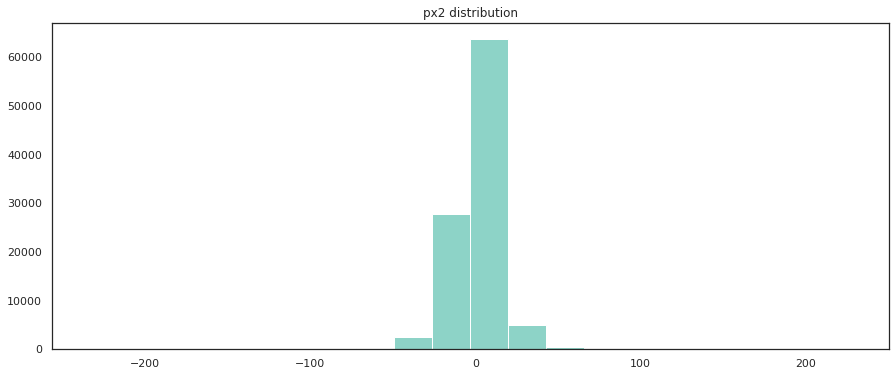

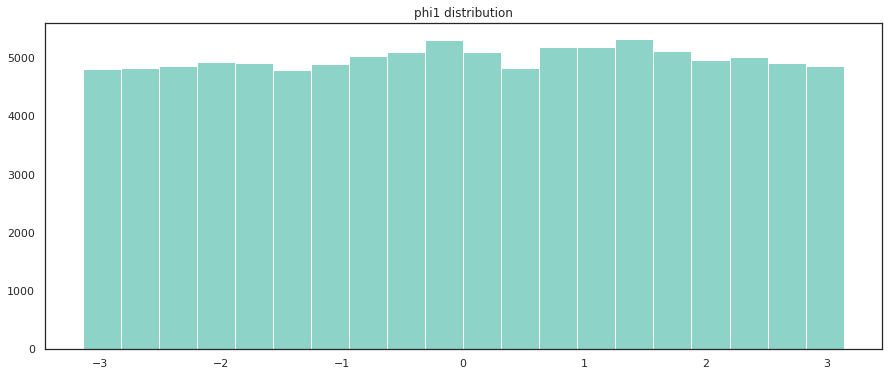

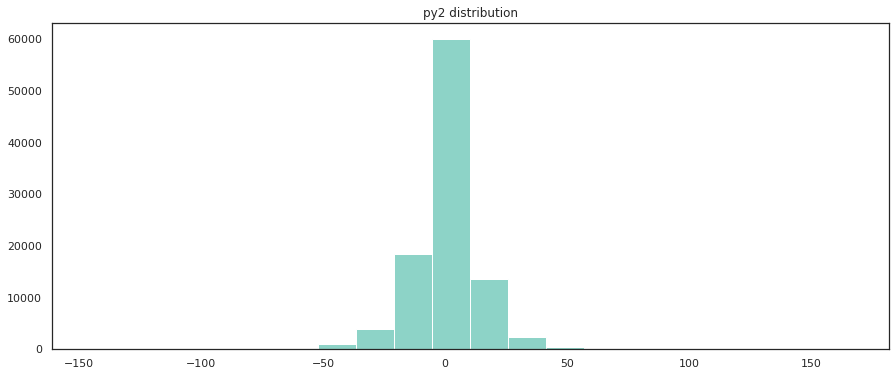

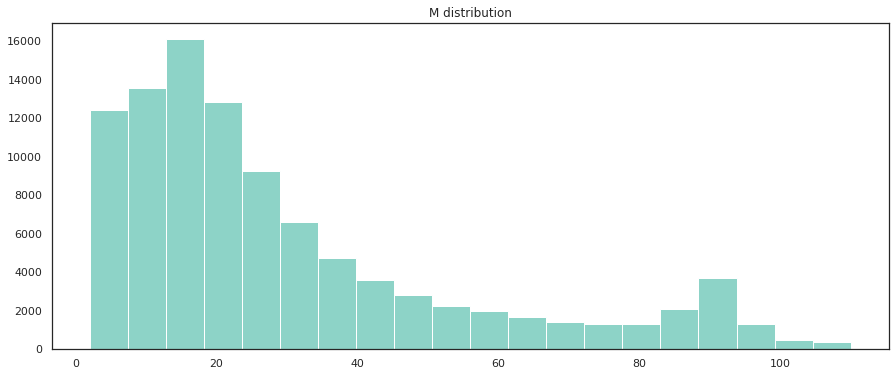

In [ ]:
for i, column in enumerate(columns):
    plt.figure(figsize=(15, 6))
    
    plt.hist(df_chosen_columns[columns[i]], bins=20)
    plt.title(column + ' distribution');

*Выбросы* — значения, которые сильно отличаются от большинства значений выборки. Они могут возникать из-за ошибки измерения, из-за необычной природы входных данных, но также могут быть и частью распределения.

По гистограммам предположите, в каких из исследуемых признаков могут быть выбросы?

**Ответ**: px2, py2, и M 

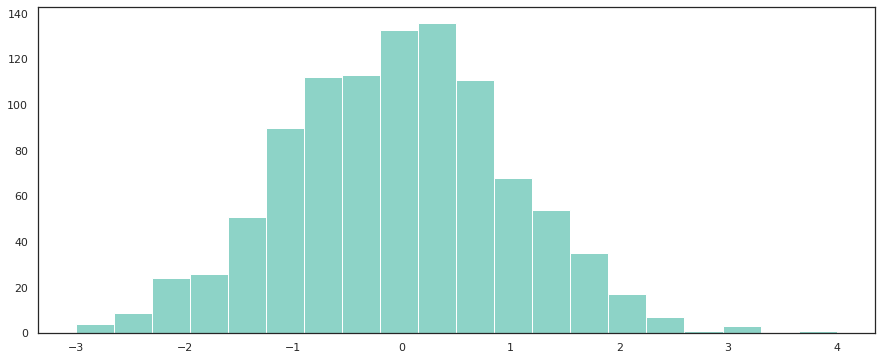

In [ ]:
sample = sps.norm.rvs(size=1000)

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

Как видим, большая часть значений находятся в промежутке от -3 до 3.

Теперь добавим выброс — очень большое значение, которое могло появиться, например, в результате ошибок измерения. Допустим, что выброс — первое измерение.

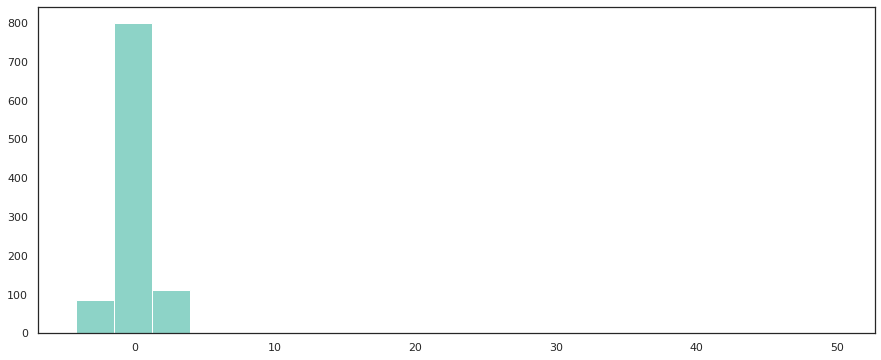

In [ ]:
outlier = 50
sample[0] = outlier

plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20);

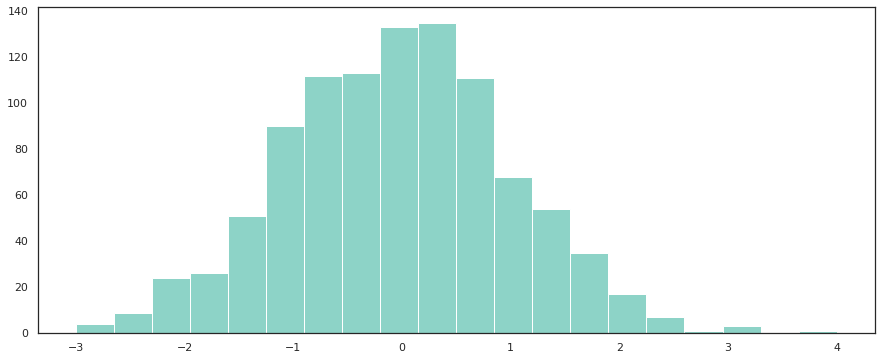

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4));

In [ ]:
ranges_without_outliers_example = {
    'px2' : (-50, 50),
    'phi1' : (-3, 3),
    'py2' : (-50, 50),
    'M' : (0, 100)
}

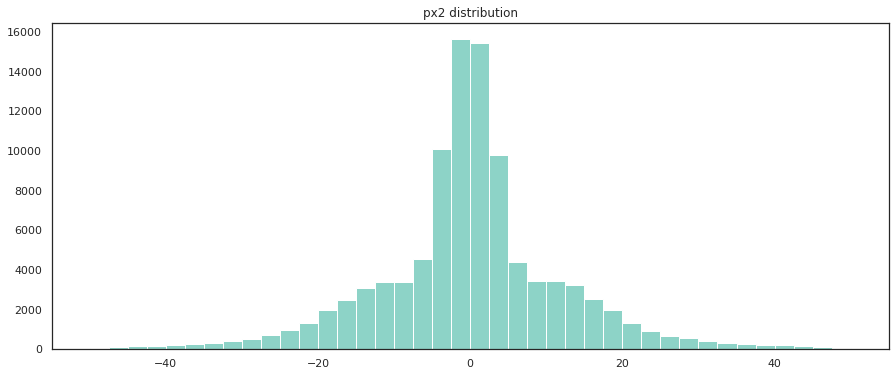

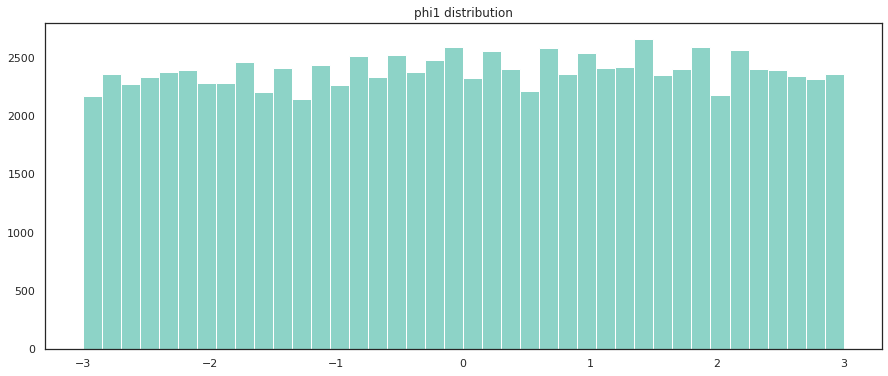

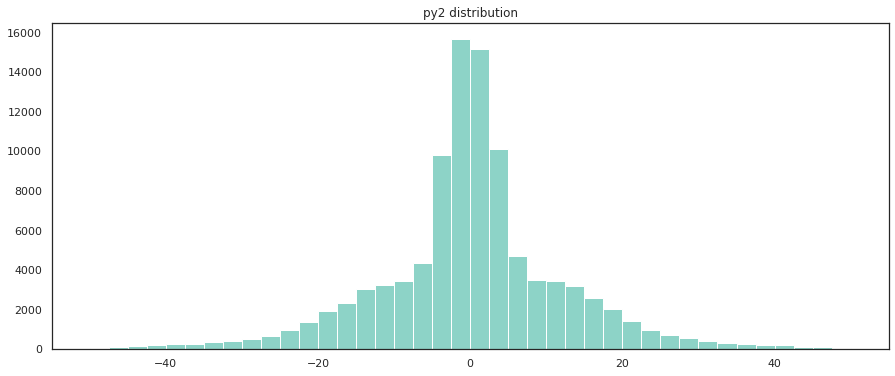

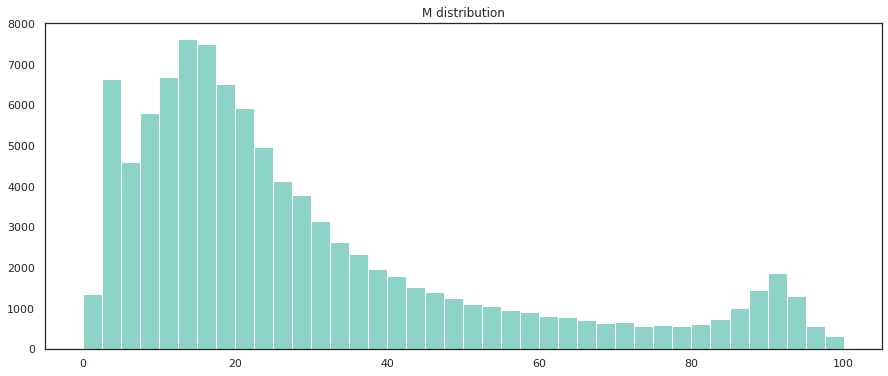

In [ ]:
ranges_without_outliers = {
    'px2' : (-50, 50),
    'phi1' : (-3, 3),
    'py2' : (-50, 50),
    'M' : (0, 100)
}

for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=40)
    plt.title(column + ' distribution')

**Вывод**: проделанная выше работа сделала графики более информативными

**Ядерные оценки плотности**

In [ ]:
sns.__version__

'0.11.2'

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


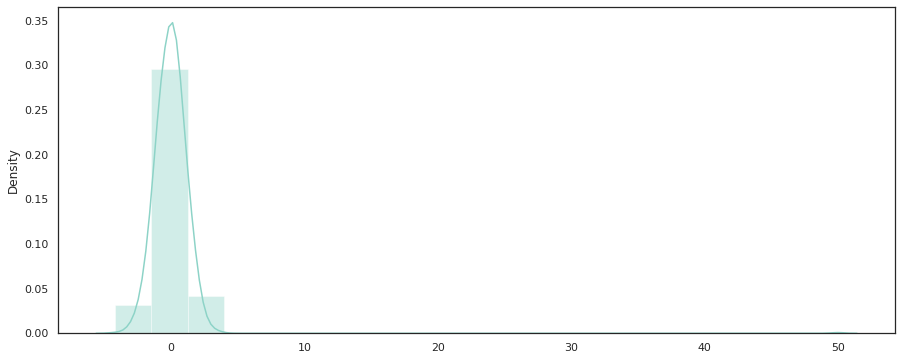

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(sample, bins=20);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


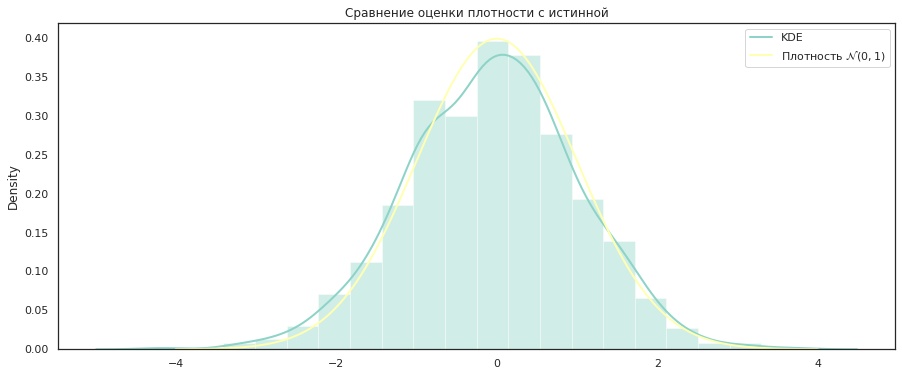

In [ ]:
# уберем выброс
sample_wo_ourliers = sample[1:]

# сетка от -4 до 4 из 1000 значений
grid = np.linspace(-4, 4, 1000)
# считаем значения функции в выборке
norm_pdf_values = sps.norm.pdf(grid)

# отрисовка графика
plt.figure(figsize=(15, 6))
sns.distplot(sample_wo_ourliers, bins=20, kde_kws={"label": "KDE", "linewidth": 2})
plt.plot(grid, norm_pdf_values, label='Плотность $\\mathcal{N}(0,1)$', lw=2)
plt.title('Сравнение оценки плотности с истинной')
plt.legend();

In [ ]:
arr = sps.expon.rvs(size=100)

In [ ]:
arr = sps.expon.rvs(size=100)

In [ ]:
arr_grid = np.linspace(0, 6, 1000)
arr_pdf_values = sps.expon.pdf(arr_grid)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


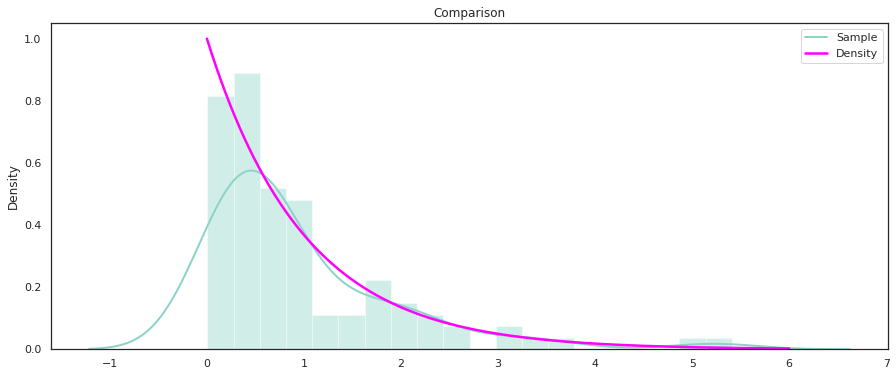

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(mas, bins=20, kde_kws={'label': 'Sample', 'linewidth': 2})
plt.plot(arr_grid, arr_pdf_values, label='Density', lw=2.5, color='magenta')
plt.title('Kernel Density Estimation')
plt.legend()

**Q.:** Как вы думаете, почему ядерная оценка плотности так плохо приближает реальную плотность распределения?

**A.:** Вероятнее всего на это влияют выбросы

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

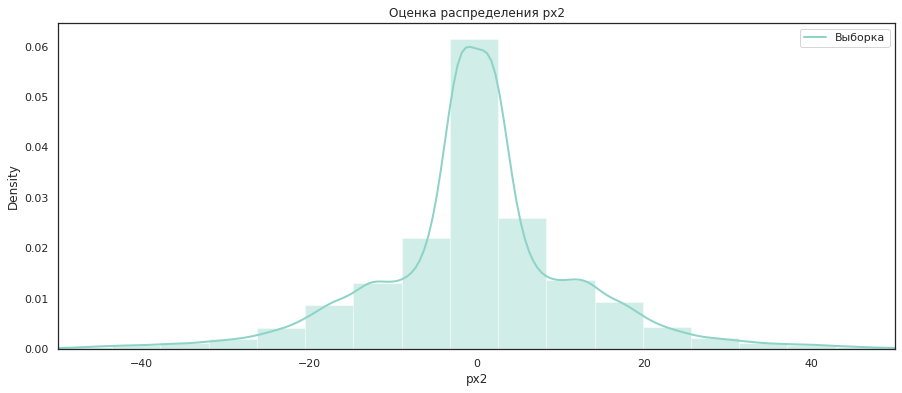

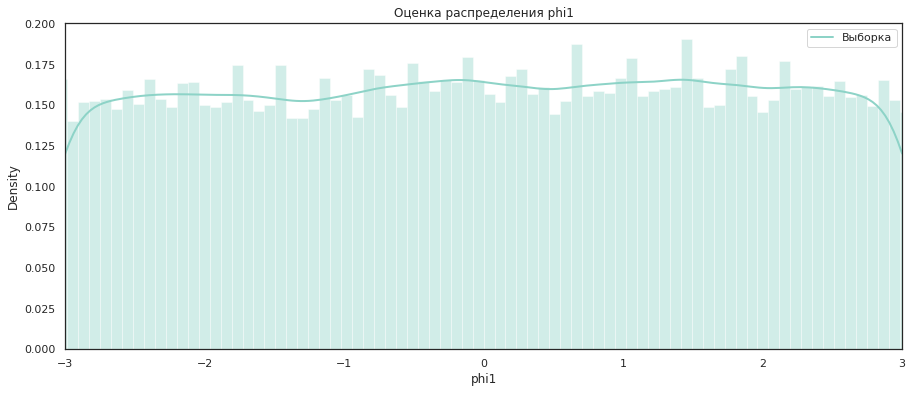

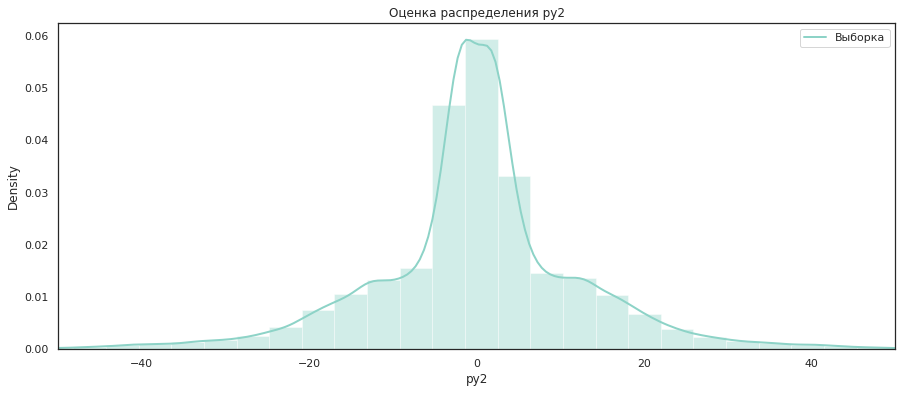

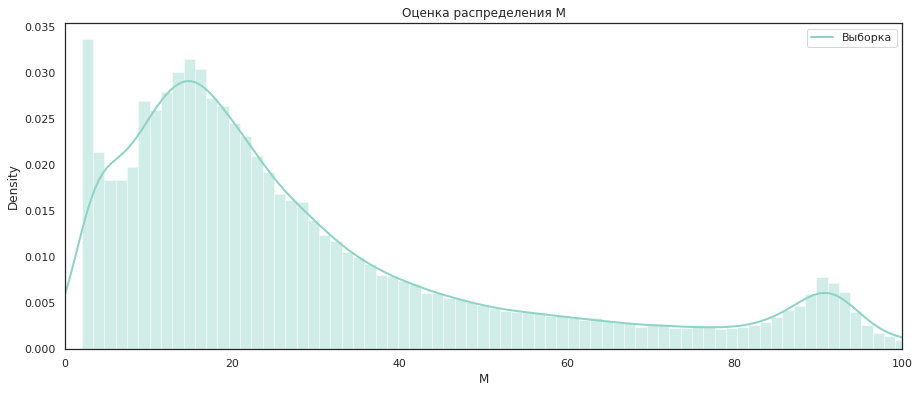

In [ ]:
ranges_without_outliers = {
    'px2' : (-50, 50),
    'phi1' : (-3, 3),
    'py2' : (-50, 50),
    'M' : (0, 100)
}
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.xlim(column_range)
    # для каждого признака оставьте значения внутри ранее заданного промежутка column_range
    # plt.hist(df_chosen_columns[column], range=column_range, bins=40)
    sns.distplot(df_chosen_columns[column], bins=80, kde_kws={'label': 'Выборка', 'linewidth': 2, 'clip':column_range})

    plt.title('Оценка распределения ' + column)
    plt.legend()

**Q.**: Какой из двух видов графиков более нагляден для данных выборки?

**A.:** Сравнив построенные графики, можно сделать вывод, что более информативным и наглядным является с ядерной оценкой плотности.

**Q.:** Какими свойствами должно обладать распределение признака, чтобы ядерная оценка плотности, полученная по выборке, была похожа на настоящую плотность?

**A.:** Необходимо минимизировать количество выбросов.

**Вывод:** Здесь мы "избавились" от выбросов для того, чтобы понять, как распределена бóльшая часть выборки.

Но нужно понимать, что избавляться от выбросов при анализе данных стоит не всегда. Прежде, чем удалять выбросы из выборки, хорошо бы понимать:

Какая цель исследования. Например, если мы хотим узнать, как хорошо "средний" студент МФТИ решает задачи по теории вероятностей, результаты лучших студентов на потоке не сильно проясняют ситуацию и затрудняют анализ. Такие результаты нужно выкинуть. Если же надо отобрать студентов на стажировку для аналитиков данных, хорошие результаты не только не нужно отсеивать, но и нужно анализировать дополнительно.
Почему отличающееся значение могло появиться в выборке. Это случайность / ошибка в измерениях / следствие какого-то еще фактора? Возможно, удаление отличающегося элемента лишит нас важных знаний о природе исследуемых данных.

_______________________________________________________


